This project will focus on analysis of where crimes happen in Chicago and how they are affected by various factors. The client(s) can include law<br> enforcement, the government, or the residents of Chicago. <br>
<br>It's important to know the pattern of crimes in the city and how they are affected by other factors. For law enforcement, they would be able to allocate <br>
their limited resources more effectively by sending officers to where they are likely needed the most. While crime pattern analysis is useful, the factors <br>
that contribute/affect where and what kind of crimes happen are important as well. These factors can include but not limited to: weather, income level, <br>
time of the day, public transit, poverty levels, unemployment, school closings, and demographics. If there is a correlation between crimes and one or <br>
more of these factors, actions can be taken to mitigate the situation if possible. With regards to local residents, the analysis can be useful for them <br>
to avoid certain areas during a certain time period especially when public transit stops are invovled. <br>
<br>Various data files will be used to help aid the analysis including the main crime data set from city of Chicago data portal. This data set contains <br>
<b><a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">crime data</a></b> collected over the course of 16
years between 2001 and 2016 and can be downloaded as a single csv file. The <b><a href="https://www.ncdc.noaa.gov/cdo-web/">weather data</a></b><br>is collected from NOAA website also between 2001 and 2016. The data is split into two halves because NOAA only allows a certain amount <br> information to be downloaded at a time. The file has daily summaries where things like temperature, precipitation, snow, date and coordinates are included.<br> To explore other factors, I also downloaded the following data sets to aid the analysis: <br>
<b>School closing data</b> from: <a href="https://wbez-assets.s3.amazonaws.com/WBEZ-Graphics/SchoolChart.html"> school closing data </a> <br>
<b>Unemployment data</b> from: <a href="http://www.ides.illinois.gov/LMI/Pages/Historical_Monthly_Annual_Data.aspx"> unemployment data </a><br>
<b>Chicago L transit stops</b> from: <a href="https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme"> L stops data </a><br>
Census data from 2010 census from US Census Buerau and they include: <br>
<b>Education, income, poverty levels, and race</b> data broken down by community in Chicago. They are downloaded from the following link: <a href="http://robparal.blogspot.com/2012/05/hard-to-find-census-data-on-chicago.html?m=1"> Chicago census data </a> <br>
These data files are collected either as csv files or plain html text. The html text is converted to csv in Excel. With all the data files collected, I can then <br>
begin my data cleaning and analysis in the following sections.

<h3>Data merging, cleaning and wrangling</h3>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps                                #used for plotting data on google maps using an API
import gmaps.datasets
import os
from matplotlib import cm
%config InlineBackend.figure_format = 'svg'
#plt.style.use('seaborn')
pd.set_option('display.width', 500)
#plt.rcParams['figure.dpi']= 150
pd.set_option('max_columns', 60)

In [2]:
#Since there are two weather data files, I first merged them into 1 file
weather1=pd.read_csv('data/Crime/weather1.csv')
weather2=pd.read_csv('data/Crime/weather2.csv')
#Check to see if they have the same shape
print(weather1.shape, weather2.shape)

(3652, 34) (2515, 30)


In [3]:
#Looks like the second file has less columns. Let's take a look at both files and see what we can drop
weather1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28,7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-01,0.0,0.0,0.0,NaN,41.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-02,0.0,0.0,0.0,NaN,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-03,0.0,0.0,0.0,NaN,36.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-04,0.0,0.0,0.0,NaN,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-05,0.0,0.0,0.0,NaN,31.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The WT columns are weather types and they are denoted by numbers from 01 to 19 and 21 and 22 (in the column names). Each is a difference weather <br>
type. The WV is weather in the vicinity. It can have five values: 01, 03, 07, 18 and 20. In those columns, 1.0 means that's the weather type of that day and <br>
nan means not that weather type. We can consolidate all those WT columns into one column 'weather type' and assign a value to represent the weather <br>
type of that day according to the number in its column names. A dictionary can be constructed to map the value to a weather type as a string. We will drop <br>
the WV columns as they are irrelavant for the analysis.

In [5]:
#Contruct a dictionary to map WT values to actual weather types according to NOAA documentation
weather_type={'WT01': 'Fog, ice fog, or freezing fog', 'WT02': 'Heavy fog or freezing fog', 'WT03': 'Thunder', 'WT04': 'Ice pellets, sleet, snow pellets, or small hail',
                            'WT05': 'Hail', 'WT06': 'Glaze or rime', 'WT07': 'Dust, blowing dust, or blowing obstruction', 'WT08': 'Smoke or haze', 
                            'WT09': 'Blowing or drifting snow',  'WT10': 'Tornado, waterspout, or funnel cloud', 'WT11': 'High or damaging winds', 'WT12': 'Blowing spray', 
                            'WT13': 'Mist', 'WT14': 'Drizzle', 'WT15': 'Freezing drizzle', 'WT16': 'Rain', 'WT17': 'Freezing rain', 
                            'WT18': 'Snow, snow pellets, snow grains, or ice crystals', 'WT19': 'Unknown source of precipitation', 
                            'WT20': 'Rain or snow shower', 'WT21': 'Ground fog', 'WT22': 'Ice fog or freezing fog'}

#First drop WV columns and then slice the WT columns into a new data frame
weather1.drop(['WV03', 'WV20'], axis=1, inplace=True)
weather1_wt=weather1.iloc[:, 13:34]
weather2_wt=weather2.iloc[:,12:30 ]

#Write a function to return a list with all weather types
def extract_weather_type(weather_types):
    """This function take a data frame as an argument and returns all weather types for each row in a list"""    
    weather_type_list=[]
    for i in range(len(weather_types)):
        type_per_row=[]
        for k, n in enumerate(weather_types.columns):
            if weather_types.iloc[i, k]==1.0:
                type_per_row.append(n)
        if len(type_per_row)==0:
            weather_type_list.append('Unknown')
        else:
            weather_type_list.append([weather_type[x] for x in type_per_row])
    return(weather_type_list)

#Now convert all the weather types of the two weather data sets into one single list
weather_list1=extract_weather_type(weather1_wt)
weather_list2=extract_weather_type(weather2_wt)

#Now drop all WT columns in original data sets and then add a new column named "weather_type"
weather1.drop(weather1_wt.columns, axis=1, inplace=True)
weather2.drop(weather2_wt.columns, axis=1, inplace=True)

#Add a new column to each data frame
weather1['weather_type']=weather_list1
weather2['weather_type']=weather_list2

#Drop TSUN (total sunshine) column of the first data frame since it's not present in data frame 2.
weather1.drop('TSUN', axis=1, inplace=True)

#Now the two data frame should contain the same columns, we can combine them into 1 data frame
weather=weather1.append(weather2)
weather.reset_index(inplace=True)
weather.head()

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24.0,5.0,Unknown
1,1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown
2,2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn..."
3,3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,..."
4,4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36.0,21.0,[Smoke or haze]


In [6]:
#Check the new data frame
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            3365 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


In [7]:
t_ave=(weather.TMAX+weather.TMIN)/2
weather['TAVG']=t_ave
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            6166 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


The 'PRCP' column has 1 null value, the 'SNOW' column has 2 null values, the 'SNWD' column has 33 null values, and all the temperature columns have <br>
1 null value. For precipitation values we will fill with 0 but for temperatures we will fill these missing values with forward fill.

Looks good but the TAVG has some null values. Since TAVG=(TMAX+TMIN)/2, we can recalculate all the average temperatures and recontruct the column

In [8]:
weather.loc[:, 'PRCP':'SNWD']=weather.loc[:, 'PRCP':'SNWD'].fillna(value=0)
weather.loc[:, 'TAVG': 'TMIN']=weather.loc[:, 'TAVG': 'TMIN'].fillna(method='ffill')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


Now we have a complete weather data frame to work with. Since all the stations and names are the same, we can discard those two columns as well

In [9]:
weather.drop(['STATION', 'NAME'], axis=1, inplace=True)

Next, let's convert the 'DATE' column to a datetime object and we can then use it to merge to the crime data set

In [10]:
weather['DATE']=pd.to_datetime(weather['DATE'])
weather['date']=weather['DATE'].astype(str)
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 13 columns):
index           6167 non-null int64
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null datetime64[ns]
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
date            6167 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 626.4+ KB


,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type,date
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown,2001-01-01
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown,2001-01-02
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn...",2001-01-03
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,...",2001-01-04
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze],2001-01-05


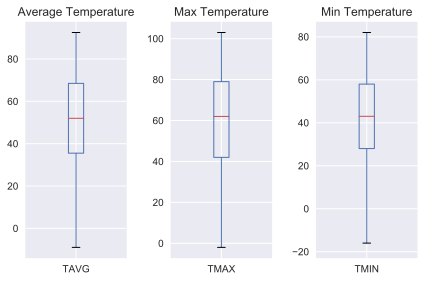

In [11]:
#Check to see how the numerica data look
descrp=['Average Temperature', 'Max Temperature', 'Min Temperature']
fig, axes=plt.subplots(nrows=1, ncols=3)
for k,n in enumerate(['TAVG', 'TMAX', 'TMIN']):
    weather[n].plot(kind='box', ax=axes.flat[k], title=descrp[k])
plt.tight_layout()   
plt.show()

Now we are going to import the crime data. This is a farily large data set and after we import it and clean it, we can break it down by years. We first load <br>
1000 rows to check the data.

In [12]:
crime_1k=pd.read_csv('data/crime/crimes_chi.csv', nrows=1000)
crime_1k.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24,40,1,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8,15,66,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7,20,68,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11,26,23,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6,8,44,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


We need to convert the date to a timestamp for easy manipulation and also merging with weather data. Since the file is large, we will process by chunks <br>
and then concatenate all the chunks to one data frame

In [13]:
crime_data_list=[]
with open('data/crime/crimes_chi.csv') as file:
    for chunk in pd.read_csv('data/crime/crimes_chi.csv', chunksize=1000000):
        chunk['Date']=pd.to_datetime(chunk['Date'], format='%m/%d/%Y %I:%M:%S %p')
        crime_data_list.append(chunk)
crimes=pd.concat(crime_data_list)

Let's check this data set and see if there are missing values or outliers.

In [14]:
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6478356 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6478356 non-null int64
Case Number             6478352 non-null object
Date                    6478356 non-null datetime64[ns]
Block                   6478356 non-null object
IUCR                    6478356 non-null object
Primary Type            6478356 non-null object
Description             6478356 non-null object
Location Description    6475409 non-null object
Arrest                  6478356 non-null bool
Domestic                6478356 non-null bool
Beat                    6478356 non-null int64
District                6478307 non-null float64
Ward                    5863502 non-null float64
Community Area          5862326 non-null float64
FBI Code                6478356 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6478356 non-null int64
Updated On       

In [15]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,2006-01-31 12:13:05,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24.0,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,2006-03-21 19:00:00,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8.0,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,2006-02-09 01:44:41,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7.0,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11.0,26.0,23.0,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6.0,8.0,44.0,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


For visualizing the crimes on google maps, we don't need the 'Ward' or 'Community' information. We only need latitude and longitude information. So <br>
we can drop those two columns first.

In [16]:
crimes.drop(['Ward', 'Community Area'], axis=1, inplace=True)

We can then drop all null rows especially when latitude and longitude information is missing

In [17]:
crimes.dropna(inplace=True)

In [18]:
#Check to see if the data frame now does not have any missing values
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389608 entries, 0 to 6478355
Data columns (total 20 columns):
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null datetime64[ns]
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389608 non-null float64
Longitude         

In [19]:
crimes.index=crimes['Date']
crimes.sort_index(inplace=True)

Now I am going to merge with the weather data to use for further analysis

In [24]:
#First create a date columns to link to weather data
crimes['date']=crimes['Date'].dt.date
crimes['date']=crimes['date'].astype(str)
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01
2001-01-01,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01
2001-01-01,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01
2001-01-01,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01
2001-01-01,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01


Now the 'date' column can be used to merge with weather data

In [22]:
weather.head()

,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn..."
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,..."
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze]


In [25]:
pd.merge(crimes, weather, on='date', how='left').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


In [26]:
#merge the two data frames into one new data frame for analysis
crimes_wea=pd.merge(crimes, weather, on='date', how='left')
crimes_wea.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
6389603,11147510,JA509544,2017-11-12 23:30:00,057XX W LAKE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1512,15.0,08B,1138028.0,1902221.0,2017,11/19/2017 03:51:13 PM,41.887829,-87.768575,"(41.887829366, -87.768575322)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389604,11149104,JA511655,2017-11-12 23:30:00,022XX W CHARLESTON ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1432,14.0,06,1161186.0,1914084.0,2017,11/19/2017 03:51:13 PM,41.919933,-87.683201,"(41.919932633, -87.683201087)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389605,11147551,JA509596,2017-11-12 23:30:00,047XX N ASHLAND AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,1912,19.0,05,1164804.0,1931504.0,2017,11/19/2017 03:51:13 PM,41.967658,-87.669412,"(41.967657963, -87.669412246)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389606,11147517,JA509554,2017-11-12 23:32:00,081XX S CORNELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,411,4.0,14,1188677.0,1851516.0,2017,11/19/2017 03:51:13 PM,41.747626,-87.584201,"(41.747626436, -87.584200954)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389607,11147527,JA509559,2017-11-12 23:45:00,118XX S MORGAN ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,524,5.0,08A,1171790.0,1826339.0,2017,11/19/2017 03:51:13 PM,41.678924,-87.646815,"(41.678923809, -87.646815265)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."


We can then save the new data frame as a csv file for future analysis. In the following sections, I will use other data sets and this new data with weather <br>
information to do some exploratory analysis

In [27]:
#Write to a CSV file for following processing
crimes_wea.to_csv('data/crime/crimes_weather.csv')

In [27]:
#12-15-17 Continue. We will try some visulizations this time.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps
plt.style.use('seaborn')
pd.set_option('max_columns', 60)

In [40]:
crime_wea=pd.read_csv('data/crime/crimes_weather.csv')

In [41]:
#The 'Arrest' column and 'Domestic' column contain boolean like data but they are strings. Let's convert them to bool type
crime_wea.loc[:, ['Arrest', 'Domestic']]=crime_wea.loc[:, ['Arrest', 'Domestic']].astype('bool')

In [42]:
crime_wea.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389608 entries, 0 to 6389607
Data columns (total 34 columns):
Unnamed: 0              6389608 non-null int64
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null object
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389

In [43]:
crime_wea['Date']=pd.to_datetime(crime_wea['Date'])
crime_wea.index=crime_wea['Date']

In [44]:
crime_wea.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,5,1313893,G000035,2001-01-01,027XX W NELSON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1411,14.0,14,1157359.0,1920111.0,2001,08/17/2015 03:03:40 PM,41.936550,-87.697098,"(41.936549915, -87.697097823)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,6,1309913,G000355,2001-01-01,026XX S INDIANA AV,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2112,2.0,14,1178078.0,1886818.0,2001,08/17/2015 03:03:40 PM,41.844745,-87.621968,"(41.844745115, -87.621968071)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,7,1780042,G600951,2001-01-01,105XX S PARNELL AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2233,22.0,26,1174535.0,1835045.0,2001,08/17/2015 03:03:40 PM,41.702754,-87.636510,"(41.702753949, -87.636509707)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,8,1329588,G025242,2001-01-01,061XX S COTTAGE GROVE AV,0820,THEFT,$500 AND UNDER,STREET,False,False,313,3.0,06,1182574.0,1864705.0,2001,08/17/2015 03:03:40 PM,41.783962,-87.606155,"(41.783961993, -87.606155349)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


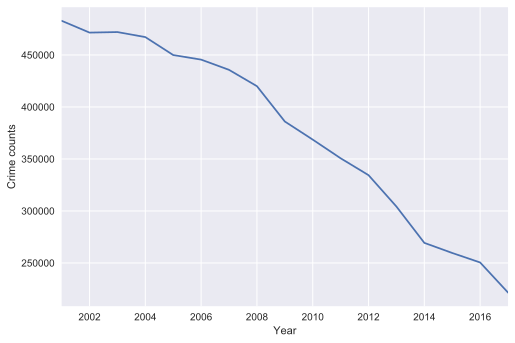

In [45]:
#First let's see how crimes change over time by year
crime_wea['ID'].resample('A').count().plot()
plt.xlabel('Year')
plt.ylabel('Crime counts')
plt.show()

The crime counts are going down from this plot from 2001 to 2016. Since these crimes are reported crimes, we can not rule out the possibility that the <br>
actual number of people that are reporting is decreasing but not crimes themselves.

Since there are so many crime types, I want to focus on the most relevant ones to concentrate our analysis. Let's do a value count of the 'Primary Type'

In [46]:
crime_wea['Primary Type'].value_counts()

THEFT                                1332798
BATTERY                              1173671
CRIMINAL DAMAGE                       738270
NARCOTICS                             685232
OTHER OFFENSE                         396399
ASSAULT                               395259
BURGLARY                              373315
MOTOR VEHICLE THEFT                   300251
ROBBERY                               243303
DECEPTIVE PRACTICE                    226211
CRIMINAL TRESPASS                     185396
PROSTITUTION                           66896
WEAPONS VIOLATION                      64865
PUBLIC PEACE VIOLATION                 46191
OFFENSE INVOLVING CHILDREN             40131
CRIM SEXUAL ASSAULT                    23663
SEX OFFENSE                            22512
GAMBLING                               14118
INTERFERENCE WITH PUBLIC OFFICER       13788
LIQUOR LAW VIOLATION                   13637
ARSON                                  10674
HOMICIDE                                8764
KIDNAPPING

I have decided to analyze the following felonies: <b>'Theft', 'Battery', 'Narcotics', 'Burglary', 'Robbery', 'Weapon violation', 'Sex offense', 'Homicide'</b> <br>
Future work can be done to analyze more crime types. <br>
<br>We can first filter out those crime types and make a new data frame.

In [47]:
#From the above info, we are going to combine the 'CRIM SEXUAL ASSAULT' and 'SEX OFFENSE' into 'SEX OFFENSE'
crime_wea['Primary Type']=crime_wea['Primary Type'].str.replace('CRIM SEXUAL ASSAULT', 'SEX OFFENSE')

In [48]:
crime_wea.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,SEX OFFENSE,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,SEX OFFENSE,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,SEX OFFENSE,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,5,1313893,G000035,2001-01-01,027XX W NELSON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1411,14.0,14,1157359.0,1920111.0,2001,08/17/2015 03:03:40 PM,41.936550,-87.697098,"(41.936549915, -87.697097823)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,6,1309913,G000355,2001-01-01,026XX S INDIANA AV,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2112,2.0,14,1178078.0,1886818.0,2001,08/17/2015 03:03:40 PM,41.844745,-87.621968,"(41.844745115, -87.621968071)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,7,1780042,G600951,2001-01-01,105XX S PARNELL AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2233,22.0,26,1174535.0,1835045.0,2001,08/17/2015 03:03:40 PM,41.702754,-87.636510,"(41.702753949, -87.636509707)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,8,1329588,G025242,2001-01-01,061XX S COTTAGE GROVE AV,0820,THEFT,$500 AND UNDER,STREET,False,False,313,3.0,06,1182574.0,1864705.0,2001,08/17/2015 03:03:40 PM,41.783962,-87.606155,"(41.783961993, -87.606155349)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


In [49]:
#Check to make sure only 'Sex offense' is left
crime_wea['Primary Type'].value_counts()

THEFT                                1332798
BATTERY                              1173671
CRIMINAL DAMAGE                       738270
NARCOTICS                             685232
OTHER OFFENSE                         396399
ASSAULT                               395259
BURGLARY                              373315
MOTOR VEHICLE THEFT                   300251
ROBBERY                               243303
DECEPTIVE PRACTICE                    226211
CRIMINAL TRESPASS                     185396
PROSTITUTION                           66896
WEAPONS VIOLATION                      64865
PUBLIC PEACE VIOLATION                 46191
SEX OFFENSE                            46175
OFFENSE INVOLVING CHILDREN             40131
GAMBLING                               14118
INTERFERENCE WITH PUBLIC OFFICER       13788
LIQUOR LAW VIOLATION                   13637
ARSON                                  10674
HOMICIDE                                8764
KIDNAPPING                              6418
INTIMIDATI

In [50]:
#Now filter to select only those 8 crimes we are going to analyze
crimes_new=crime_wea[crime_wea['Primary Type'].isin(['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 
                                                                                                 'SEX OFFENSE', 'HOMICIDE'])]

In [51]:
crimes_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3928123 entries, 2001-01-01 00:00:00 to 2017-11-12 23:30:00
Data columns (total 34 columns):
Unnamed: 0              3928123 non-null int64
ID                      3928123 non-null int64
Case Number             3928123 non-null object
Date                    3928123 non-null datetime64[ns]
Block                   3928123 non-null object
IUCR                    3928123 non-null object
Primary Type            3928123 non-null object
Description             3928123 non-null object
Location Description    3928123 non-null object
Arrest                  3928123 non-null bool
Domestic                3928123 non-null bool
Beat                    3928123 non-null int64
District                3928123 non-null float64
FBI Code                3928123 non-null object
X Coordinate            3928123 non-null float64
Y Coordinate            3928123 non-null float64
Year                    3928123 non-null int64
Updated On              3928123 non

In [14]:
#We can then delete the original data frame and save the new data frame
del crime_wea
crimes_new.to_csv('crimes_new.csv')

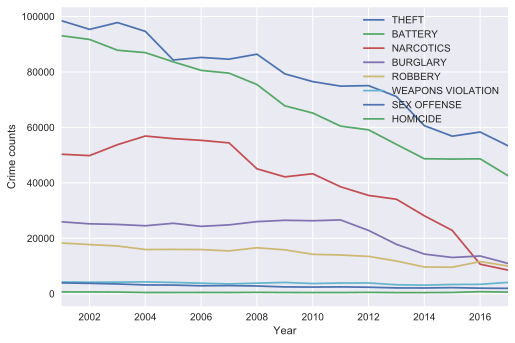

In [56]:
#Now let's look at the trend of these 8 crimes over 15 years
crime_types=['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 'SEX OFFENSE', 'HOMICIDE']
for i, c in enumerate(crime_types):
    one_crime=crimes_new[crimes_new['Primary Type']==c]
    one_crime['Primary Type'].resample('A').count().plot(label=c)
plt.xlabel('Year')
plt.ylabel('Crime counts')
plt.legend()
plt.show()

Looks like all these crimes are going down over the course of 16 years. What about break down by month?

In [30]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dfs=[]
for j, crime in enumerate(crime_types):
    counts=[]
    for i in range(1,13):
        month=crimes_new[crimes_new.index.month==i]
        month_crime=month[month['Primary Type']==crime]
        counts.append(len(month_crime))
    dfs.append(pd.DataFrame({'Months': months, 'Number of incidents': counts}))
dfs[0]

,Months,Number of incidents
0,Jan,101034
1,Feb,85568
2,Mar,102301
3,Apr,105053
4,May,114390
5,Jun,118318
6,Jul,131789
7,Aug,131361
8,Sep,120047
9,Oct,120907


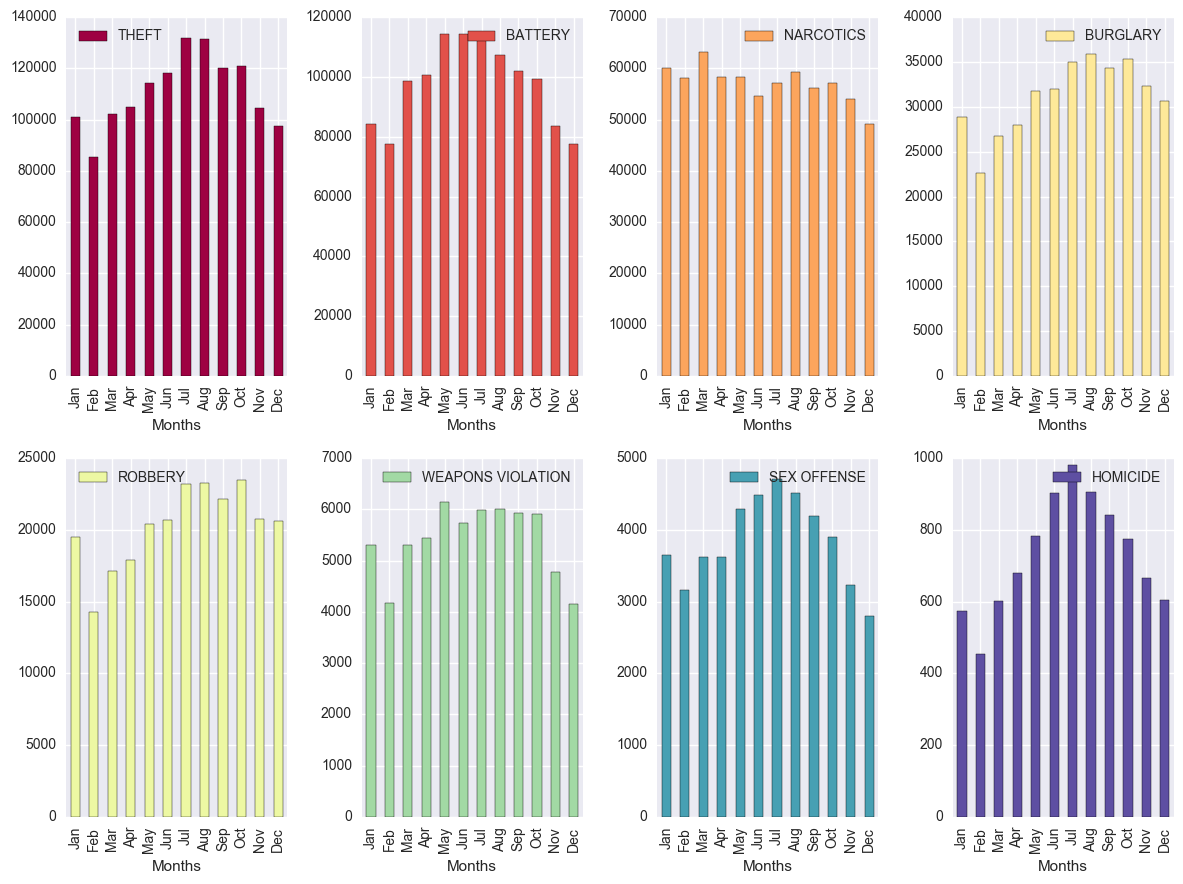

In [69]:
from matplotlib import cm

cmap=cm.get_cmap('Spectral')
fig, axes = plt.subplots(nrows=2, ncols=4)
N=8
for k, df in enumerate(dfs):
    c = cmap(float(k)/(N-1))
    df.plot(kind='bar', x='Months', y='Number of incidents', ax=axes.flat[k], label=crime_types[k], color=c)
plt.tight_layout()
plt.show()

Interesting find! Among all the 8 felonies analyzed, 7 are most frequent in warmer month (June, July, and August) but Narcotics are high in colder month <br>
, namely January, February and March. Why is that? Maybe when people tend to stay indoors they use drugs more often?

In [2]:
crimes_new=pd.read_csv('crimes_new.csv')

In [3]:
# Continue to work on 12/16/17
crime_types=['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 'SEX OFFENSE', 'HOMICIDE']
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Since we have the locations for each crime reported, we can take a look at where 'Narcotics' crimes happened and see if our explanation makes sense.

In [4]:
narcotics=crimes_new[crimes_new['Primary Type']=='NARCOTICS']
nar_loc=narcotics['Location Description'].value_counts()

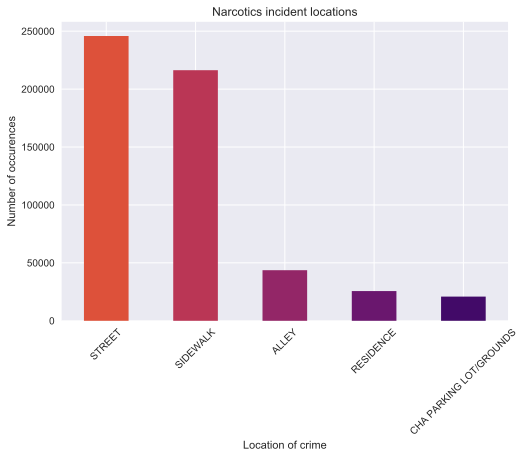

In [5]:
color = cm.inferno_r(np.linspace(.4,.8, 5))
nar_loc[0:5].plot(kind='bar', color=color)
plt.xlabel('Location of crime')
plt.ylabel('Number of occurences')
plt.title('Narcotics incident locations')
plt.xticks(rotation=45)
plt.show()

Surprisingly, the top 3 locations are all outdoor. So why are 'Narcotics' crimes high in cold months? On the other hand, let's check the top 5 locations of <br>
all crimes

In [6]:
crime_loc_counts=[]
for k, c in enumerate(crime_types):
    crime_type=crimes_new[crimes_new['Primary Type']==c]
    crime_loc=crime_type['Location Description'].value_counts()[0:5]
    crime_loc_counts.append(crime_loc)

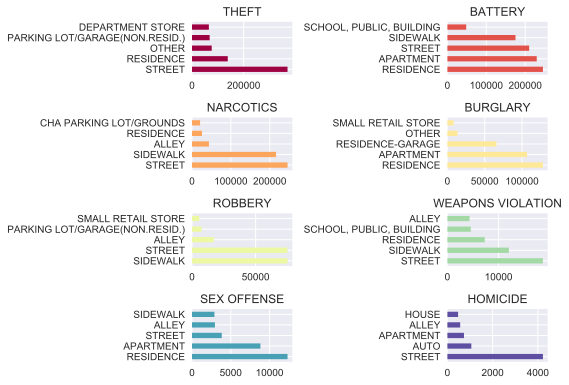

In [7]:
fig, axes=plt.subplots(nrows=4, ncols=2)
cmap=cm.get_cmap('Spectral')
N=8
for i, s in enumerate(crime_loc_counts):
    c=cmap(float(i)/(N-1))
    s.plot(kind='barh', color=c, ax=axes.flat[i], title=crime_types[i])
plt.tight_layout()
plt.show()

Narcotics happen mostly outdoors just like other crimes. So in cold weather, there are fewer people out and drug dealers are more active? This is just <br>
a hypothesis and I have no data to back it up.

For all the sex offenses incidents, most happened at either residences or apartments. How many of those are domestic? Let's take a look.

In [33]:
sex_off=crimes_new[crimes_new['Primary Type']=='SEX OFFENSE']

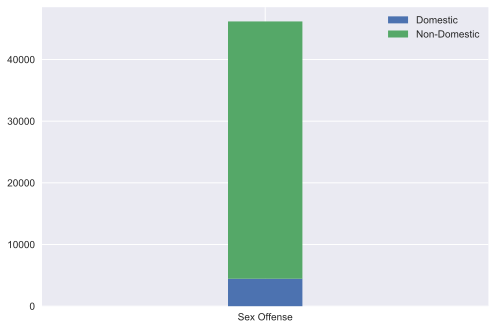

In [36]:
sex_off_dome=sex_off['Domestic'].sum()
sex_off_non_dome=len(sex_off)-sex_off_dome
sex_off_df=pd.DataFrame({'Domestic': sex_off_dome, 'Non-Domestic': sex_off_non_dome}, index=np.array(['Sex Offense']))
sex_off_df.plot(kind='bar', stacked=True, width=0.1)
plt.xticks(rotation=0)
plt.show()

Most sex offenses are non-domestic. 

Now let's examine the average temperature in each month across 16 years

In [10]:
crimes_new['Date']=pd.to_datetime(crimes_new['Date'])
crimes_new.index=crimes_new['Date']
crimes_new.head()

,Date,Unnamed: 0,ID,Case Number,Date.1,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001-01-01,0,3272413,HK299011,2001-01-01 00:00:00,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2001-01-01,1,5508664,HN320275,2001-01-01 00:00:00,009XX N HARDING AVE,0266,SEX OFFENSE,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2001-01-01,2,2743135,HJ380339,2001-01-01 00:00:00,039XX N MOZART ST,0266,SEX OFFENSE,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2001-01-01,3,2126730,HH368190,2001-01-01 00:00:00,060XX W ARDMORE AVE,0281,SEX OFFENSE,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2001-01-01,8,1329588,G025242,2001-01-01 00:00:00,061XX S COTTAGE GROVE AV,0820,THEFT,$500 AND UNDER,STREET,False,False,313,3.0,06,1182574.0,1864705.0,2001,08/17/2015 03:03:40 PM,41.783962,-87.606155,"(41.783961993, -87.606155349)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


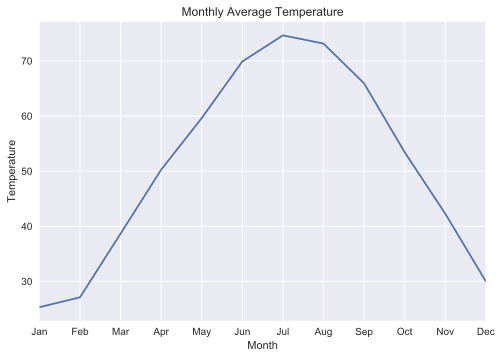

In [11]:
# We will look at the 'TAVG' column
temps=[]
for i in range(1,13):
    month=crimes_new[crimes_new.index.month==i]
    month_temp_avg=month['TAVG'].mean()
    temps.append(month_temp_avg)
monthly_avg_temp=pd.Series(temps, index=months)
monthly_avg_temp.plot()
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(np.arange(12), months)
plt.show()

As expected, average temperatures are the highest during summer months (June, July and August) and low in January, February and March. How does <br>
temperature affect crimes? If we set temperatures into different bins and count the number of crimes in each bin maybe there is a correlation?

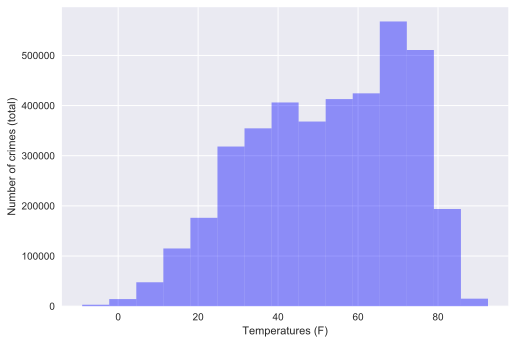

In [17]:
sns.distplot(crimes_new['TAVG'], bins=15, kde=False, color='blue')
plt.xlabel('Temperatures (F)')
plt.ylabel('Number of crimes (total)')
plt.show()

So from the distribution of the crimes based on temperature, we can see that at higher temperature, there are more crimes. It makes sense since most <br>
crimes happen outdoors, the warmer the weather, the more people are outside. <br>
But what about individual crimes such as Narcotics mentioned above? What's the distribution of those crimes based on temp?  Let's compare all the <br>
histograms of the 8 felonies and their relationship to temperature.

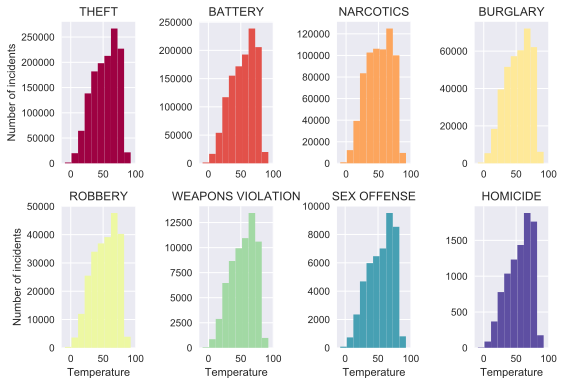

In [32]:
fig2, axes2=plt.subplots(nrows=2, ncols=4)
cmap=cm.get_cmap('Spectral')
for i, c in enumerate(crime_types):
    crime_type=crimes_new[crimes_new['Primary Type']==c]
    color=cmap(float(i)/(N-1))
    crime_type['TAVG'].plot.hist(bins=10, ax=axes2.flat[i], color=color, title=c)
    axes2.flat[i].set_xticks(np.linspace(0,100, 3))
    axes2.flat[i].set_ylabel('')
axes2.flat[0].set_ylabel('Number of incidents')
axes2.flat[4].set_ylabel('Number of incidents')
axes2.flat[4].set_xlabel('Temperature')
axes2.flat[5].set_xlabel('Temperature')
axes2.flat[6].set_xlabel('Temperature')
axes2.flat[7].set_xlabel('Temperature')
plt.tight_layout()
plt.show()

Here we see that for Narcotics, there is a pretty high shoulder where temperatures are low unlike other crimes. This is in agreement with our previous <br>
plots where we plotted monthly crime data for each type of crime. There must be a reason for narcotics crimes to be higher than others in colder days.

Next let's look at the distribution of these crimes during a week. Which weekday seems to have more crimes?